In [1]:
#In This notebook implements Logistic Regression using Statsmodel package.
#Also it finds Lift curve and Gain curve manually and by using Scikitplot Library

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [4]:
bank = pd.read_csv('bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.info() # variables included in the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.shape

(45211, 17)

In [7]:
bank['deposit'].value_counts()

no     39922
yes     5289
Name: deposit, dtype: int64

In [8]:
# Conversion of previous line to percentage 
round(bank['deposit'].value_counts(normalize=True) *100,2)


no     88.3
yes    11.7
Name: deposit, dtype: float64

In [9]:
#Above output shows that data is highly imbalanced.
#Now, Have a look on some visualizations to understand more about data

<Axes: xlabel='deposit', ylabel='count'>

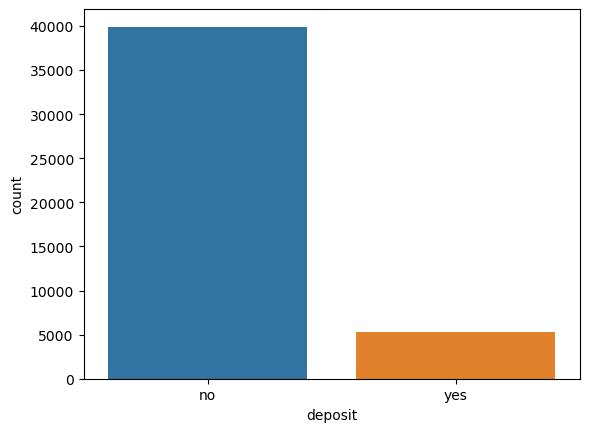

In [10]:
sns.countplot(x='deposit',data =bank)

<Axes: xlabel='deposit', ylabel='balance'>

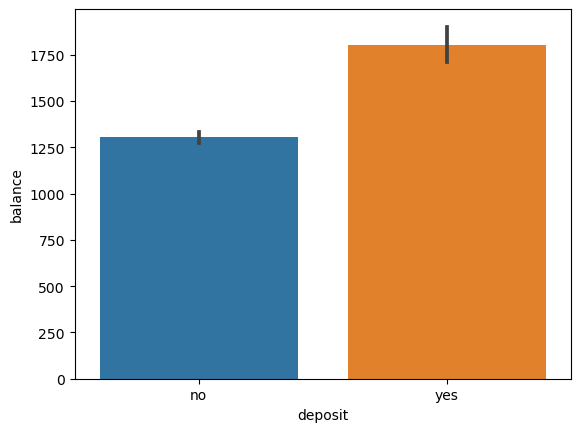

In [11]:
sns.barplot(x='deposit',y='balance',data=bank)

<Axes: xlabel='campaign', ylabel='count'>

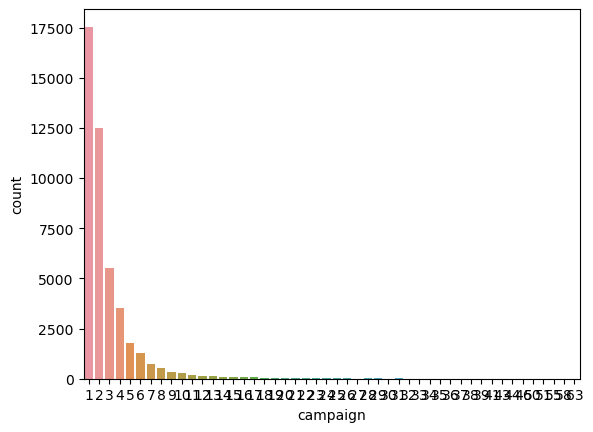

In [12]:
sns.countplot(x='campaign',data=bank)
#Following graph shows that as number of campaigns increases number of participants decreases

<Axes: xlabel='deposit', ylabel='previous'>

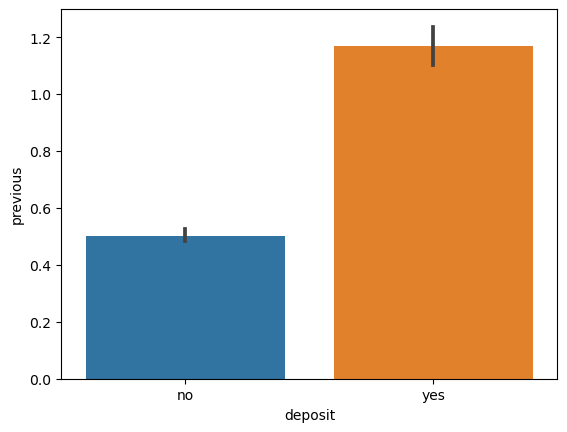

In [13]:
#Relationship between previous campaigns and the deposit column
sns.barplot(x='deposit',y='previous',data=bank)

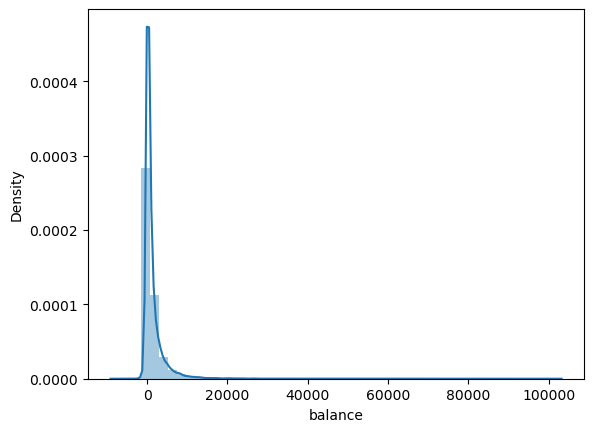

In [14]:
#Let us see distribution of balance of the customers
sns.distplot(bank['balance']);

In [15]:
#Now we remove dependent column which we have to predict
X_features = list(bank.columns)
X_features.remove('deposit')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [16]:
#Converting all categorical values into one hot encodings
encoded_bank_df = pd.get_dummies(bank[X_features],drop_first = True)

In [17]:
#Converting dependent variable to 0 or 1
Y=bank.deposit.map(lambda x: int(x== 'yes'))
X=encoded_bank_df

In [18]:
#Importing statsmodel package to perform Logistic Regression
import statsmodels.api as sm

In [19]:
logit_model = sm.Logit(Y,sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.238463
         Iterations 8


In [20]:
#Now,observe the output of model
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Method:            MLE       
Dependent Variable:  deposit           Pseudo R-squared:  0.339     
Date:                2023-10-04 17:18  AIC:               21648.2702
No. Observations:    45211             BIC:               22023.1913
Df Model:            42                Log-Likelihood:    -10781.   
Df Residuals:        45168             LL-Null:           -16315.   
Converged:           1.0000            LLR p-value:       0.0000    
No. Iterations:      8.0000            Scale:             1.0000    
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -2.5356   0.1837 -13.8028 0.0000 -2.8957 -2.1756
age                  0.0001   0.0022   0.0511 0.9592 -0.0042  0.0044
balance              0.0000   0.0000   2.4934 0.0127  0.0000  0.0000
day                  0.0100   0.0025   3.9929 0.0001  0.0051  0.0149
duration             0.0042   0.0001  64.9852 0.0000  0.0041  0.0043
campaign            -0.0908   0.0101  -8.9551 0.0000 -0.1107 -0.0709
pdays               -0.0001   0.0003  -0.3355 0.7373 -0.0007  0.0005
previous             0.0102   0.0065   1.5612 0.1185 -0.0026  0.0229
job_blue-collar     -0.3099   0.0727  -4.2641 0.0000 -0.4523 -0.1674
job_entrepreneur    -0.3571   0.1256  -2.8440 0.0045 -0.6032 -0.1110
job_housemaid       -0.5040   0.1365  -3.6931 0.0002 -0.7715 -0.2365
job_management      -0.1653   0.0733  -2.2550 0.0241 -0.3089 -0.0216
job_retired          0.2524   0.0972   2.5958 0.0094  0.0618  0.4429
job_self-employed   -0.2983   0.1120  -2.6638 0.0077 -0.5178 -0.0788
job_services        -0.2238   0.0841  -2.6622 0.0078 -0.3886 -0.0590
job_student          0.3821   0.1090   3.5049 0.0005  0.1684  0.5958
job_technician      -0.1760   0.0689  -2.5535 0.0107 -0.3111 -0.0409
job_unemployed      -0.1767   0.1116  -1.5828 0.1135 -0.3955  0.0421
job_unknown         -0.3133   0.2335  -1.3418 0.1797 -0.7708  0.1443
marital_married     -0.1795   0.0589  -3.0462 0.0023 -0.2949 -0.0640
marital_single       0.0925   0.0673   1.3752 0.1691 -0.0393  0.2243
education_secondary  0.1835   0.0648   2.8325 0.0046  0.0565  0.3105
education_tertiary   0.3789   0.0753   5.0311 0.0000  0.2313  0.5266
education_unknown    0.2505   0.1039   2.4108 0.0159  0.0468  0.4541
default_yes         -0.0167   0.1628  -0.1024 0.9184 -0.3358  0.3025
housing_yes         -0.6754   0.0439 -15.3953 0.0000 -0.7614 -0.5894
loan_yes            -0.4254   0.0600  -7.0906 0.0000 -0.5430 -0.3078
contact_telephone   -0.1634   0.0752  -2.1729 0.0298 -0.3107 -0.0160
contact_unknown     -1.6232   0.0732 -22.1831 0.0000 -1.7666 -1.4798
month_aug           -0.6939   0.0785  -8.8424 0.0000 -0.8477 -0.5401
month_dec            0.6911   0.1767   3.9117 0.0001  0.3448  1.0374
month_feb           -0.1473   0.0894  -1.6476 0.0994 -0.3226  0.0279
month_jan           -1.2617   0.1217 -10.3672 0.0000 -1.5003 -1.0232
month_jul           -0.8308   0.0774 -10.7331 0.0000 -0.9825 -0.6791
month_jun            0.4536   0.0937   4.8428 0.0000  0.2700  0.6372
month_mar            1.5899   0.1199  13.2652 0.0000  1.3550  1.8248
month_may           -0.3991   0.0723  -5.5213 0.0000 -0.5408 -0.2574
month_nov           -0.8734   0.0844 -10.3471 0.0000 -1.0388 -0.7080
month_oct            0.8814   0.1080   8.1591 0.0000  0.6697  1.0932
month_sep            0.8741   0.1195   7.3144 0.0000  0.6398  1.1083
poutcome_other       0.2035   0.0899   2.2645 0.0235  0.0274  0.3796
poutcome_success     2.2911   0.0823  27.8212 0.0000  2.1297  2.4525
poutcome_unknown    -0.0918   0.0935  -0.9820 0.3261 -0.2750  0.0914
====================================================================

"""

In [21]:
#In summary you can can notice that statsmodel give us more statistical values than sklearn

In [22]:
#In summary p values shows that how much a variable has significance on perdiction
#So we use all those variables which has more p value

In [23]:
X_features = ['previous',
             'pdays',
             'job_unknown',
             'poutcome_unknown',
             'default_yes',
             'age']

In [24]:
logit_model_2 = sm.Logit(Y,sm.add_constant( X[X_features])).fit()

Optimization terminated successfully.
         Current function value: 0.346355
         Iterations 7


In [25]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: deposit          Pseudo R-squared: 0.040      
Date:               2023-10-04 17:18 AIC:              31332.1352 
No. Observations:   45211            BIC:              31393.1689 
Df Model:           6                Log-Likelihood:   -15659.    
Df Residuals:       45204            LL-Null:          -16315.    
Converged:          1.0000           LLR p-value:      1.8178e-280
No. Iterations:     7.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -0.7445   0.0845  -8.8080 0.0000 -0.9101 -0.5788
previous           0.0027   0.0055   0.4864 0.6267 -0.0081  0.0134
pdays             -0.0033   0.0003 -13.2844 0.0000 -0.0038 -0.0028
job_unknown        0.0388   0.1866   0.2080 0.8353 -0.3269  0.4046
poutcome_unknown  -1.7862   0.0629 -28.3953 0.0000 -1.9095 -1.6630
default_yes       -0.4845   0.1448  -3.3456 0.0008 -0.7684 -0.2007
age                0.0059   0.0014   4.3092 0.0000  0.0032  0.0085
==================================================================

"""

In [26]:
y_pred_df = pd.DataFrame({'actual':Y,'predicted_prob':logit_model_2.predict(sm.add_constant(X[X_features]))})

In [27]:
y_pred_df

,actual,predicted_prob
0,0,0.100859
1,0,0.093663
2,0,0.088336
3,0,0.095165
4,0,0.091512
...,...,...
45206,1,0.097202
45207,1,0.107976
45208,1,0.283424
45209,0,0.100329


In [28]:
#Now sort predicted probabilities  in  descending order
import pandas as pd
y_pred_df = pd.DataFrame({'actual':Y,'predicted_prob':logit_model_2.predict(sm.add_constant(X[X_features]))})
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values('predicted_prob',
                                                                       ascending = False)

In [29]:
sorted_predict_df 

,predicted_prob,actual
44420,0.445446,1
44410,0.429720,0
44403,0.418028,1
44401,0.410151,1
44421,0.406676,0
...,...,...
44858,0.033434,1
44837,0.033416,0
44829,0.033364,1
43978,0.023316,0


In [30]:
num_per_decile = int(len(sorted_predict_df)/10)
print("Number of observation per decile: ",num_per_decile)

Number of observation per decile:  4521


In [31]:
#Function to get decile(split data into ten equal parts)
def get_deciles(df):
    df['decile']=1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile,df.columns.get_loc('decile')]= each_d
        idx += num_per_decile
    df['decile'] = df['decile']+1
    return df

In [32]:
deciles_predict_df = get_deciles(sorted_predict_df)

In [33]:
deciles_predict_df

,predicted_prob,actual,decile
44420,0.445446,1,1
44410,0.429720,0,1
44403,0.418028,1,1
44401,0.410151,1,1
44421,0.406676,0,1
...,...,...,...
44858,0.033434,1,10
44837,0.033416,0,10
44829,0.033364,1,10
43978,0.023316,0,10


In [34]:
gain_lift_df= pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']

In [35]:
gain_lift_df

,decile,gain
0,1,1401
1,2,755
2,3,356
3,4,318
4,5,327
5,6,331
6,7,344
7,8,406
8,9,423
9,10,628


In [36]:
gain_lift_df['gain_percentage']=(100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df

,decile,gain,gain_percentage
0,1,1401,26.488939
1,2,755,40.763849
2,3,356,47.494801
3,4,318,53.507279
4,5,327,59.689922
5,6,331,65.948194
6,7,344,72.452259
7,8,406,80.128569
8,9,423,88.126300
9,10,628,100.000000


In [37]:
#Above you notice that more than 70% subscribers are found in first seven deciles

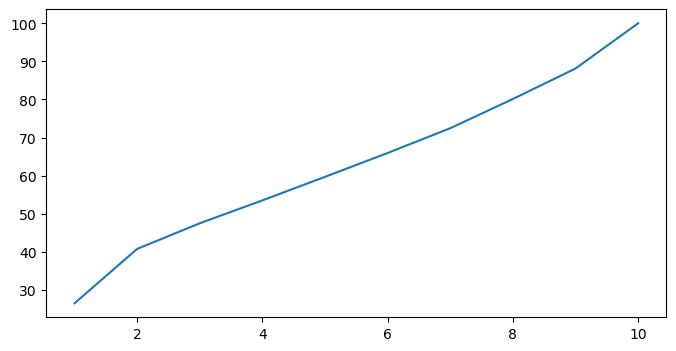

In [38]:
plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['gain_percentage'],'-')
plt.show()

In [39]:
#Now,calculate lift to see how good deciles are
gain_lift_df['lift']= (gain_lift_df.gain_percentage/(gain_lift_df.decile * 10))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,1401,26.488939,2.648894
1,2,755,40.763849,2.038192
2,3,356,47.494801,1.583160
3,4,318,53.507279,1.337682
4,5,327,59.689922,1.193798
5,6,331,65.948194,1.099137
6,7,344,72.452259,1.035032
7,8,406,80.128569,1.001607
8,9,423,88.126300,0.979181
9,10,628,100.000000,1.000000


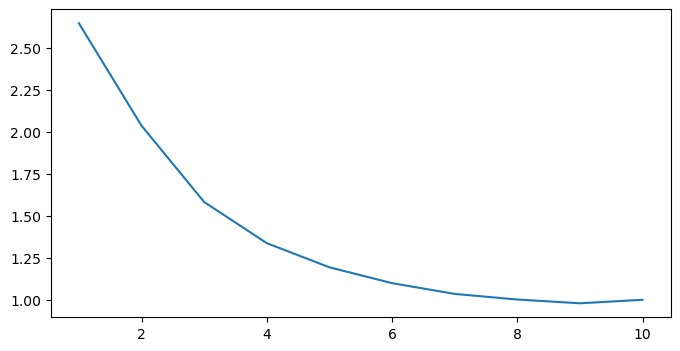

In [40]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['lift'],'-')
plt.show()

In [41]:
#Developing model using Logistic Regression SKLearn Package

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logit = LogisticRegression()
#Fitting model with X and Y values of dataset
logit.fit(X,Y)

LogisticRegression()

In [44]:
pred_y = logit.predict_proba(X)

In [45]:
pred_y

array([[0.953342  , 0.046658  ],
       [0.97377568, 0.02622432],
       [0.98052306, 0.01947694],
       ...,
       [0.33231645, 0.66768355],
       [0.9223958 , 0.0776042 ],
       [0.87058397, 0.12941603]])

In [46]:
type(pred_y)

numpy.ndarray

In [47]:
y_pred_df_new = pd.DataFrame({'actual':Y,'predicted_prob': pred_y[:,1]})

In [48]:
y_pred_df_new.head()

,actual,predicted_prob
0,0,0.046658
1,0,0.026224
2,0,0.019477
3,0,0.021527
4,0,0.107405


In [49]:
sorted_predict_df_new = y_pred_df_new[['predicted_prob','actual']].sort_values('predicted_prob',ascending =False)

In [50]:
deciles_predict_df_new = get_deciles(sorted_predict_df_new)

In [51]:
deciles_predict_df_new[0:20]

,predicted_prob,actual,decile
24148,1.000000,0,1
44602,0.999992,0,1
9947,0.999988,1,1
19639,0.999978,0,1
24095,0.999977,0,1
21113,0.999974,0,1
24044,0.999956,1,1
12347,0.999884,1,1
28872,0.999836,0,1
31337,0.999788,1,1


In [52]:
gain_lift_df_new = pd.DataFrame(deciles_predict_df_new.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df_new.columns = ['decile','gain']

In [53]:
gain_lift_df_new['gain_percentage']=(100*gain_lift_df_new.gain.cumsum()/gain_lift_df_new.gain.sum())

In [54]:
gain_lift_df_new

,decile,gain,gain_percentage
0,1,2302,43.524296
1,2,1257,67.290603
2,3,677,80.090754
3,4,373,87.143127
4,5,243,91.737569
5,6,176,95.065230
6,7,111,97.163925
7,8,59,98.279448
8,9,37,98.979013
9,10,54,100.000000


In [55]:
gain_lift_df_new['lift']=(gain_lift_df_new.gain_percentage / (gain_lift_df_new.decile * 10))
gain_lift_df_new

,decile,gain,gain_percentage,lift
0,1,2302,43.524296,4.352430
1,2,1257,67.290603,3.364530
2,3,677,80.090754,2.669692
3,4,373,87.143127,2.178578
4,5,243,91.737569,1.834751
5,6,176,95.065230,1.584420
6,7,111,97.163925,1.388056
7,8,59,98.279448,1.228493
8,9,37,98.979013,1.099767
9,10,54,100.000000,1.000000


In [56]:
#We can also calculate Lift and Gain curves by just writting a single line of code 

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

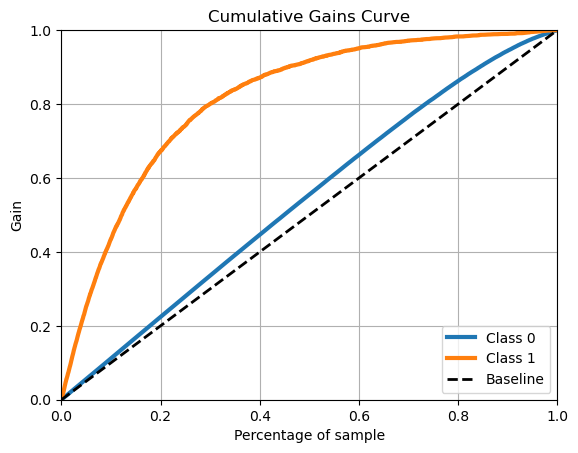

In [58]:
import scikitplot as skplt
#following line is used to find Gains Curve
skplt.metrics.plot_cumulative_gain(Y,pred_y)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

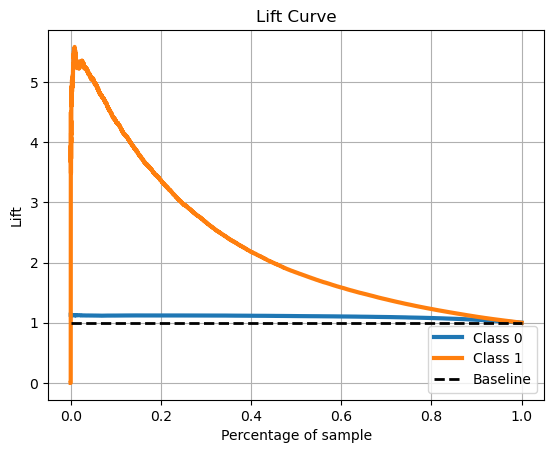

In [59]:
#Following line is used to find Lift curve
skplt.metrics.plot_lift_curve(Y,pred_y)